In [41]:
import pandas as pd
import matplotlib.pyplot as mtplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
original = pd.read_spss("survey_answers_translated.sav")

In [43]:
print(original.columns.tolist())

['timestamp', 'bfi1', 'bfi2', 'bfi3', 'bfi4', 'bfi5', 'bfi6', 'bfi7', 'bfi8', 'bfi9', 'bfi10', 'bfi11', 'bfi12', 'bfi13', 'bfi14', 'bfi15', 'bfi16', 'bfi17', 'bfi18', 'bfi19', 'bfi20', 'bfi21', 'bfi22', 'bfi23', 'bfi24', 'bfi25', 'bfi26', 'bfi27', 'bfi28', 'bfi29', 'bfi30', 'bfi31', 'bfi32', 'bfi33', 'bfi34', 'bfi35', 'bfi36', 'bfi37', 'bfi38', 'bfi39', 'bfi40', 'bfi41', 'bfi42', 'bfi43', 'bfi44', 'cfq1', 'cfq2', 'cfq3', 'cfq4', 'cfq5', 'cfq6', 'cfq7', 'cfq8', 'cfq9', 'cfq10', 'cfq11', 'cfq12', 'cfq13', 'cfq14', 'cfq15', 'cfq16', 'cfq17', 'cfq18', 'cfq19', 'cfq20', 'cfq21', 'cfq22', 'cfq23', 'cfq24', 'cfq25', 'dass_a1', 'dass_a2', 'dass_a3', 'dass_a4', 'dass_a5', 'dass_a6', 'dass_a7', 'sfpq_l1', 'sfpq_l2', 'sfpq_l3', 'sfpq_l4', 'sfpq_l5', 'sfpq_l6', 'sfpq_l7', 'sfpq_w1', 'sfpq_w2', 'sfpq_w3', 'sfpq_w4', 'sfpq_w5', 'sfpq_w6', 'sfpq_w7', 'age', 'gender', 'work_status', 'level_education', 'BFI_E', 'BFI_A', 'BFI_C', 'BFI_N', 'BFI_O', 'CFQ_total', 'DASS_A', 'SFPQ_W', 'SFPQ_L']


In [44]:
# Take a subset of columns
# We don't want individual items, or the B5.
# Just predicting anx. based on flow, CFQ and demographics.
anx_data = original.loc[
    :,
    ["age", "gender", "work_status", "level_education", "CFQ_total", "DASS_A", "SFPQ_W", "SFPQ_L"]
 ]

Visualizations

(array([114.,  61.,  40.,  21.,  16.,   7.,   5.,   6.,   0.,   3.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

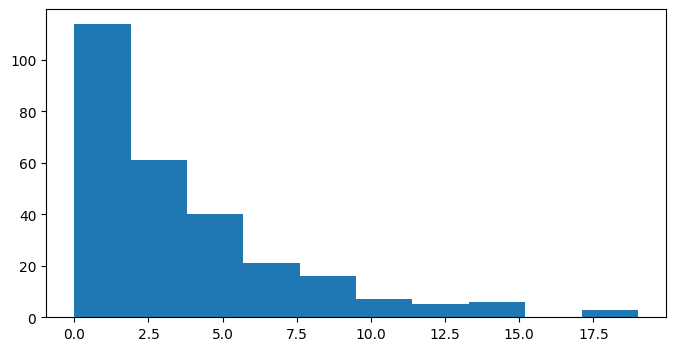

In [45]:
mtplot.hist(anx_data.DASS_A)

In [46]:
work_freq = anx_data.work_status.value_counts()

<BarContainer object of 2 artists>

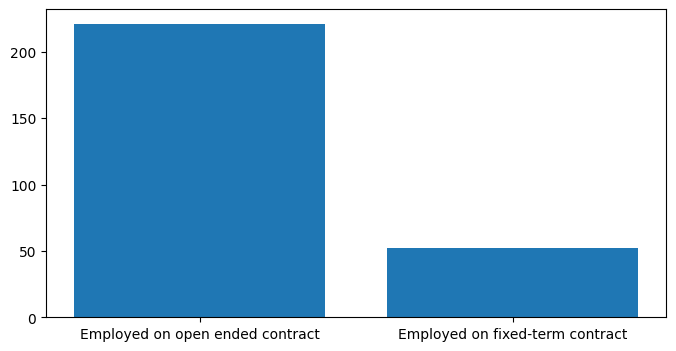

In [47]:
mtplot.bar(
    work_freq.index,
    work_freq.values
    )

(array([ 3., 20., 44., 78., 58., 40., 21.,  6.,  2.,  1.]),
 array([ 1. ,  9.8, 18.6, 27.4, 36.2, 45. , 53.8, 62.6, 71.4, 80.2, 89. ]),
 <BarContainer object of 10 artists>)

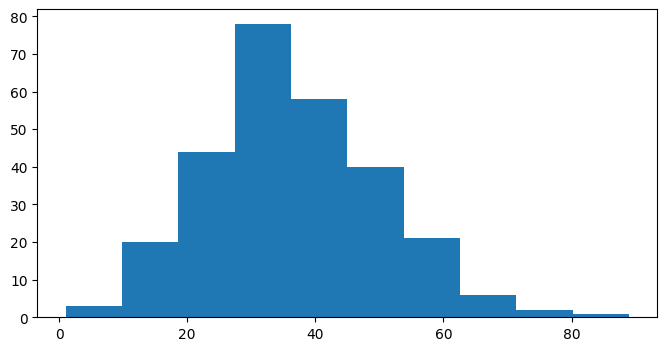

In [48]:
mtplot.hist(anx_data.CFQ_total)

(array([ 1., 10., 13., 26., 29., 33., 78., 44., 24., 15.]),
 array([1.71428571, 2.04285714, 2.37142857, 2.7       , 3.02857143,
        3.35714286, 3.68571429, 4.01428571, 4.34285714, 4.67142857,
        5.        ]),
 <BarContainer object of 10 artists>)

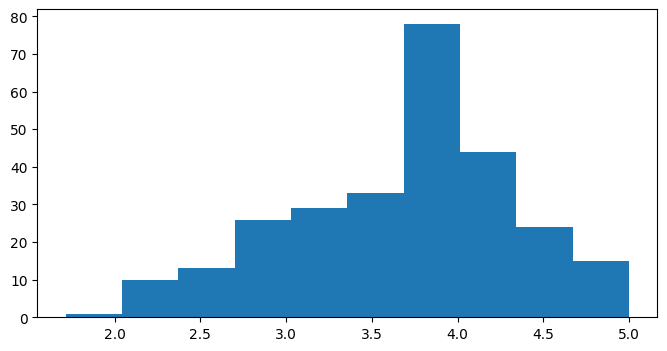

In [49]:
mtplot.hist(anx_data.SFPQ_W)

(array([ 1.,  3., 13., 15., 18., 63., 69., 57., 22., 12.]),
 array([1.57142857, 1.91428571, 2.25714286, 2.6       , 2.94285714,
        3.28571429, 3.62857143, 3.97142857, 4.31428571, 4.65714286,
        5.        ]),
 <BarContainer object of 10 artists>)

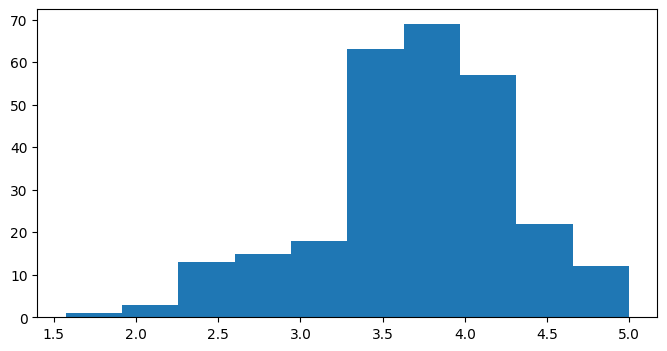

In [50]:
mtplot.hist(anx_data.SFPQ_L)

Some correlations

In [51]:
# Function to show a scatterplot with a fit line to better indicate correlations
def scatter_bestfit(x, y):
    # Find line of best fit
    a, b = np.polyfit(x,
        y,
        1)

    mtplot.scatter(
        x,
        y,
        alpha = 0.3
    )

    output = mtplot.plot(x,
                    a * x + b)
    
    return(output)

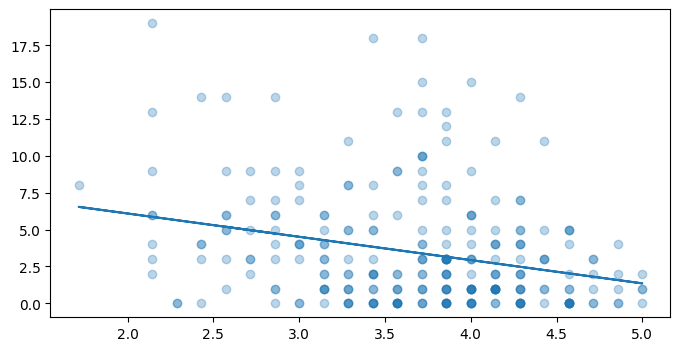

In [52]:
scatter_bestfit(
    anx_data.SFPQ_W,
    anx_data.DASS_A
)


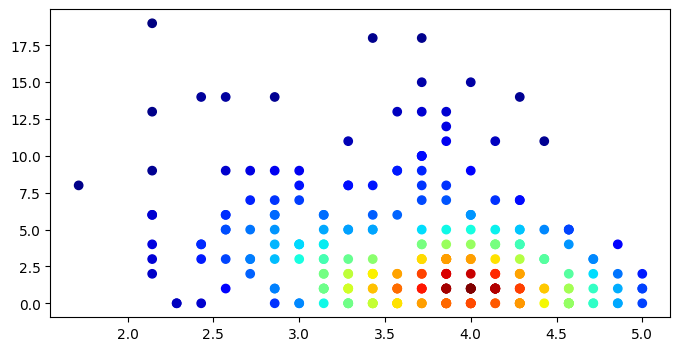

In [53]:
# https://stackoverflow.com/questions/19064772/visualization-of-scatter-plots-with-overlapping-points-in-matplotlib
# Heat-map like

# Doesn't actually help that much - the primary problem of DASS data being closely grouped on the low end
from scipy.stats import gaussian_kde as kde
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm

flow_anx = anx_data.loc[:, ["SFPQ_W", "DASS_A"]]

densObj = kde(flow_anx.to_numpy().T)

def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

colours = makeColours( densObj.evaluate( flow_anx.to_numpy().T ) )

mtplot.scatter(anx_data.SFPQ_W,
    anx_data.DASS_A,
     color=colours )
     
mtplot.show()

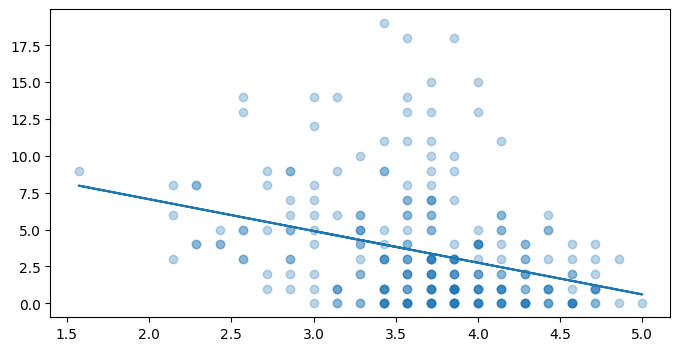

In [54]:
scatter_bestfit(
    anx_data.SFPQ_L,
    anx_data.DASS_A
)


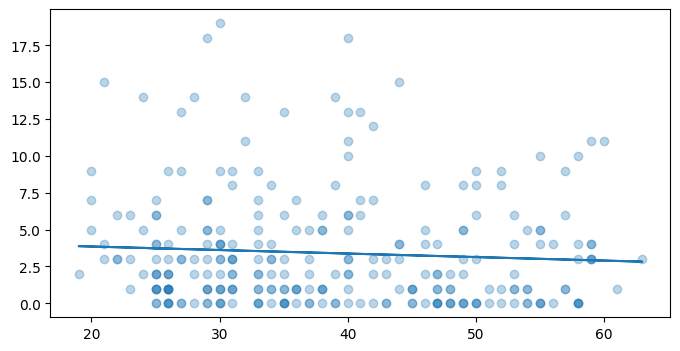

In [55]:
# Get indices of missing data. Filter to non-missing by inverting via ~
missings = anx_data.age.isna()

scatter_bestfit(
   anx_data.age[~missings],
   anx_data.DASS_A[~missings]
)

C:\Users\User\AppData\Local\Temp\ipykernel_152652\2051119223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("gender")["DASS_A"].mean()


<BarContainer object of 2 artists>

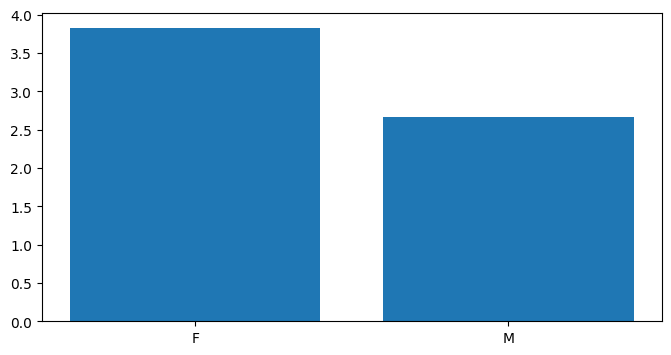

In [56]:
plot_data = anx_data.groupby("gender")["DASS_A"].mean()
mtplot.bar(plot_data.keys(), plot_data.values)

In [57]:
anx_data.gender

0      F
1      F
2      F
3      M
4      M
      ..
268    F
269    F
270    F
271    F
272    F
Name: gender, Length: 273, dtype: category
Categories (2, object): ['F', 'M']

C:\Users\User\AppData\Local\Temp\ipykernel_152652\2051119223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("gender")["DASS_A"].mean()


<BarContainer object of 2 artists>

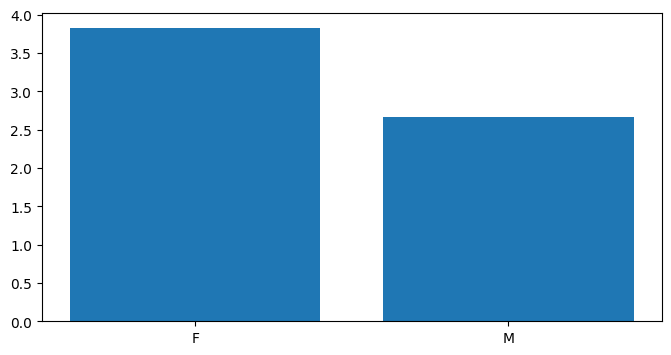

In [58]:
plot_data = anx_data.groupby("gender")["DASS_A"].mean()
mtplot.bar(plot_data.keys(), plot_data.values)

C:\Users\User\AppData\Local\Temp\ipykernel_152652\1395598957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("work_status")["DASS_A"].mean()


<BarContainer object of 2 artists>

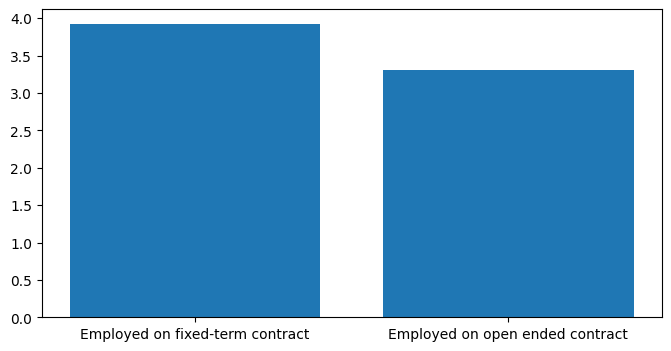

In [59]:
plot_data = anx_data.groupby("work_status")["DASS_A"].mean()
mtplot.bar(plot_data.keys(), plot_data.values)

C:\Users\User\AppData\Local\Temp\ipykernel_152652\1567939649.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = anx_data.groupby("level_education")["DASS_A"].mean()


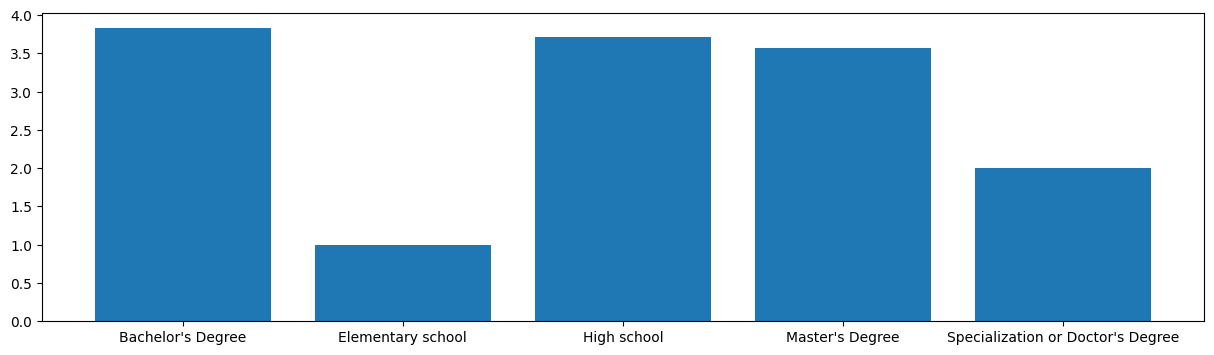

In [60]:
%matplotlib inline
mtplot.rcParams['figure.figsize'] = (15, 4)

plot_data = anx_data.groupby("level_education")["DASS_A"].mean()
mtplot.bar(plot_data.keys(), plot_data.values)

# Restore size for new plots
mtplot.rcParams['figure.figsize'] = (8, 4)

Creating a log variable for DASS-A
also adding 0.001 so there are no issues taking the log of 0

In [61]:
anx_data["DASS_A_log"] = np.log(anx_data["DASS_A"] + 1)

anx_data

,age,gender,work_status,level_education,CFQ_total,DASS_A,SFPQ_W,SFPQ_L,DASS_A_log
0,26.0,F,Employed on open ended contract,Master's Degree,36.0,4.0,2.857143,3.571429,1.609438
1,25.0,F,Employed on fixed-term contract,Master's Degree,27.0,6.0,2.571429,3.000000,1.945910
2,54.0,F,Employed on open ended contract,Master's Degree,44.0,5.0,3.285714,3.285714,1.791759
3,24.0,M,Employed on fixed-term contract,Bachelor's Degree,31.0,5.0,3.428571,2.571429,1.791759
4,22.0,M,Employed on fixed-term contract,Bachelor's Degree,48.0,6.0,2.571429,3.571429,1.945910
...,...,...,...,...,...,...,...,...,...
268,56.0,F,Employed on open ended contract,Master's Degree,37.0,4.0,3.000000,3.000000,1.609438
269,35.0,F,Employed on fixed-term contract,Master's Degree,32.0,6.0,2.142857,3.142857,1.945910
270,35.0,F,Employed on open ended contract,Bachelor's Degree,17.0,1.0,3.428571,4.142857,0.693147
271,33.0,F,Employed on open ended contract,Master's Degree,52.0,5.0,2.571429,2.714286,1.791759


(array([63.,  0., 51., 29., 32., 40., 21., 16., 12.,  9.]),
 array([0.        , 0.29957323, 0.59914645, 0.89871968, 1.19829291,
        1.49786614, 1.79743936, 2.09701259, 2.39658582, 2.69615905,
        2.99573227]),
 <BarContainer object of 10 artists>)

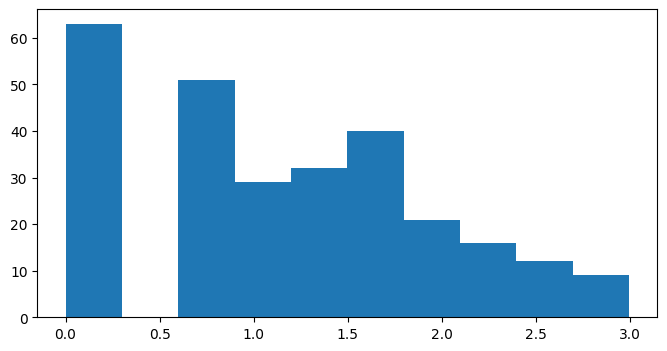

In [62]:
mtplot.hist(anx_data.DASS_A_log)

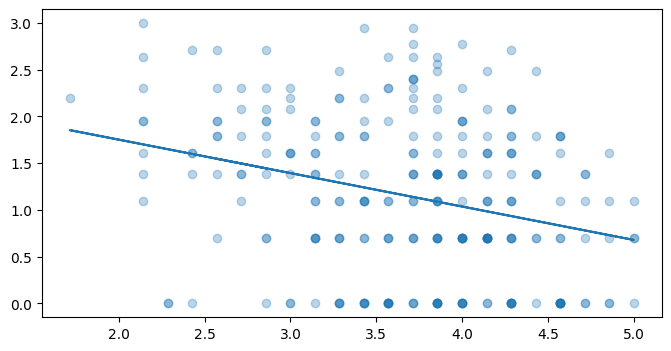

In [63]:
scatter_bestfit(
    anx_data.SFPQ_W,
    anx_data.DASS_A_log
)


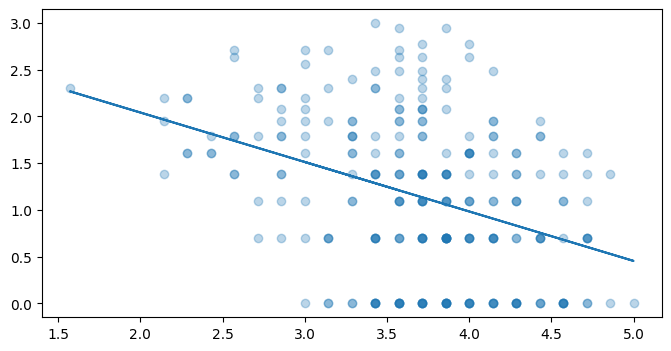

In [64]:
scatter_bestfit(
    anx_data.SFPQ_L,
    anx_data.DASS_A_log
)


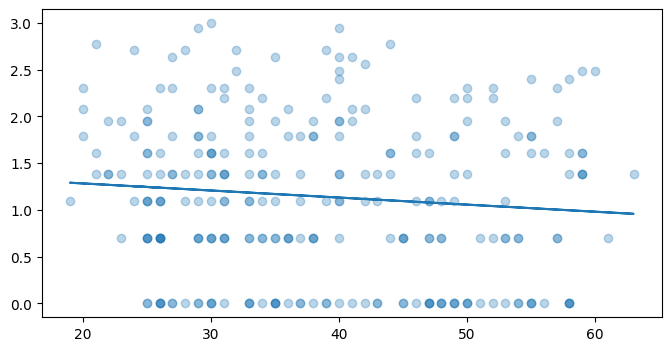

In [65]:
# Get indices of missing data. Filter to non-missing by inverting via ~
missings = anx_data.age.isna()

scatter_bestfit(
   anx_data.age[~missings],
   anx_data.DASS_A_log[~missings]
)

As far as I can tell, the relationships don't actually map better linearly. The main issue is the large amount of 0's in DASS_A results

# Set division and preprocessing data

In [67]:
dummied_data = pd.get_dummies(anx_data, prefix=["gender", "work", "edu"])

dummied_data.head()

,age,CFQ_total,DASS_A,SFPQ_W,SFPQ_L,DASS_A_log,gender_F,gender_M,work_Employed on fixed-term contract,work_Employed on open ended contract,edu_Bachelor's Degree,edu_Elementary school,edu_High school,edu_Master's Degree,edu_Specialization or Doctor's Degree
0,26.0,36.0,4.0,2.857143,3.571429,1.609438,True,False,False,True,False,False,False,True,False
1,25.0,27.0,6.0,2.571429,3.000000,1.945910,True,False,True,False,False,False,False,True,False
2,54.0,44.0,5.0,3.285714,3.285714,1.791759,True,False,False,True,False,False,False,True,False
3,24.0,31.0,5.0,3.428571,2.571429,1.791759,False,True,True,False,True,False,False,False,False
4,22.0,48.0,6.0,2.571429,3.571429,1.945910,False,True,True,False,True,False,False,False,False


In [68]:
# Cleanup some names from long values
dummied_data.rename(columns = 
                    {
                        "work_Employed on fixed-term contract" : "work_fixed",
                        "work_Employed on open ended contract" : "work_open",
                        "edu_Bachelor's Degree" : "edu_bachelors",
                        "edu_Elementary school" : "edu_elementary",
                        "edu_High school" : "edu_highschool",
                        "edu_Master's Degree" : "edu_masters",
                        "edu_Specialization or Doctor's Degree" : "edu_doctors"
                    },
                    inplace=True)


In [74]:
dummied_data.head()

,age,CFQ_total,DASS_A,SFPQ_W,SFPQ_L,DASS_A_log,gender_F,gender_M,work_fixed,work_open,edu_bachelors,edu_elementary,edu_highschool,edu_masters,edu_doctors
0,26.0,36.0,4.0,2.857143,3.571429,1.609438,True,False,False,True,False,False,False,True,False
1,25.0,27.0,6.0,2.571429,3.000000,1.945910,True,False,True,False,False,False,False,True,False
2,54.0,44.0,5.0,3.285714,3.285714,1.791759,True,False,False,True,False,False,False,True,False
3,24.0,31.0,5.0,3.428571,2.571429,1.791759,False,True,True,False,True,False,False,False,False
4,22.0,48.0,6.0,2.571429,3.571429,1.945910,False,True,True,False,True,False,False,False,False


In [77]:
train_set, other = train_test_split(dummied_data, train_size = 0.7, random_state=1234)

print(train_set.shape)
train_set.head()

(191, 15)


,age,CFQ_total,DASS_A,SFPQ_W,SFPQ_L,DASS_A_log,gender_F,gender_M,work_fixed,work_open,edu_bachelors,edu_elementary,edu_highschool,edu_masters,edu_doctors
238,44.0,50.0,15.0,3.714286,4.000000,2.772589,True,False,False,True,False,False,False,True,False
189,36.0,29.0,0.0,3.857143,4.857143,0.000000,True,False,False,True,False,False,False,False,True
59,38.0,49.0,1.0,4.000000,4.285714,0.693147,True,False,False,True,True,False,False,False,False
99,40.0,53.0,10.0,3.714286,3.285714,2.397895,True,False,False,True,False,False,True,False,False
108,56.0,39.0,0.0,4.142857,3.428571,0.000000,False,True,False,True,True,False,False,False,False


In [71]:
cv_set, test_set = train_test_split(other, train_size = 0.5, random_state=1234)
cv_set.shape

(41, 9)

In [81]:
predictor_columns = ["CFQ_total", "SFPQ_W", "SFPQ_L"]
train_main_pred = train_set.loc[:, predictor_columns]
train_main_pred

,CFQ_total,SFPQ_W,SFPQ_L
238,50.0,3.714286,4.000000
189,29.0,3.857143,4.857143
59,49.0,4.000000,4.285714
99,53.0,3.714286,3.285714
108,39.0,4.142857,3.428571
...,...,...,...
143,30.0,4.285714,4.142857
152,62.0,2.142857,3.428571
204,34.0,4.285714,4.000000
53,59.0,3.285714,3.714286


In [82]:
# Another set, adding demographics
predictor_columns_demog = predictor_columns + \
["gender_F", "gender_M", "age", "work_fixed", "work_open", "edu_elementary", "edu_highschool", "edu_bachelors", "edu_masters", "edu_doctors"]
train_demog = train_set.loc[:, predictor_columns_demog]
train_demog

,CFQ_total,SFPQ_W,SFPQ_L,gender_F,gender_M,age,work_fixed,work_open,edu_elementary,edu_highschool,edu_bachelors,edu_masters,edu_doctors
238,50.0,3.714286,4.000000,True,False,44.0,False,True,False,False,False,True,False
189,29.0,3.857143,4.857143,True,False,36.0,False,True,False,False,False,False,True
59,49.0,4.000000,4.285714,True,False,38.0,False,True,False,False,True,False,False
99,53.0,3.714286,3.285714,True,False,40.0,False,True,False,True,False,False,False
108,39.0,4.142857,3.428571,False,True,56.0,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,30.0,4.285714,4.142857,False,True,47.0,False,True,False,False,True,False,False
152,62.0,2.142857,3.428571,False,True,31.0,False,True,False,True,False,False,False
204,34.0,4.285714,4.000000,True,False,58.0,False,True,False,False,False,True,False
53,59.0,3.285714,3.714286,False,True,27.0,False,True,False,False,True,False,False


# Defining models
## Linear regression

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linear_reg = LinearRegression()

linear_reg.fit(train_main_pred, train_set["DASS_A"])

LinearRegression()

In [96]:
def report_metrics(actual_values, predictions, set_name = ""):
    mae = mean_absolute_error(actual_values, predictions)
    rsq = r2_score(actual_values, predictions)
    print(f"{set_name} set MAE: {mae:.2f}\n \
        R^2: {rsq:.2f}")

In [97]:
train_predictions = linear_reg.predict(train_main_pred)

report_metrics(train_set["DASS_A"], train_predictions, "Training")

test_predictions = linear_reg.predict(test_set.loc[:, predictor_columns])

report_metrics(test_set["DASS_A"], test_predictions, "Test")


Training set MAE: 2.36
         R^2: 0.28
Test set MAE: 2.72
         R^2: 0.12
